In [58]:
import pandas as pd

authors = pd.read_csv('data/authors.txt', sep=r'\|\-\-\|', header=None, index_col=False, engine='python')
authors.columns = ['paper_id', 'author_names']
print(authors.head())
print("Number of papers with no authors: ", authors['author_names'].isnull().sum())

   paper_id                                       author_names
0         0  James H. Niblock,Jian-Xun Peng,Karen R. McMene...
1         1              Jian-Xun Peng,Kang Li,De-Shuang Huang
2         2                                        J. Heikkila
3         3         L. Teslic,B. Hartmann,O. Nelles,I. Skrjanc
4         4      Long Zhang,Kang Li,Er-Wei Bai,George W. Irwin
Number of papers with no authors:  0


In [59]:
abstracts = pd.read_csv('data/abstracts.txt', sep=r'\|\-\-\|', header=None, index_col=False, engine='python')
abstracts.columns = ['paper_id', 'abstracts']
print(abstracts.head())
print("Number of papers with no abstract:", abstracts['abstracts'].isnull().sum())

   paper_id                                          abstracts
0         0  The development of an automated system for the...
1         1  This paper proposes a novel hybrid forward alg...
2         2  Modern CCD cameras are usually capable of a sp...
3         3  This paper deals with the problem of fuzzy non...
4         4  A number of neural networks can be formulated ...
Number of papers with no abstract: 7249


In [60]:
citation_probabilities = pd.read_csv('data/submission_random.csv', sep=',', index_col=False, engine='python')
citation_probabilities.columns = ['paper_id', 'probability']
citation_probabilities.head()

,paper_id,probability
0,0,0.833146
1,1,0.600638
2,2,0.020457
3,3,0.960325
4,4,0.533223


In [61]:
print(len(authors))
print(len(citation_probabilities))

138499
106692


In [62]:
edgelist = pd.read_csv('data/edgelist.txt', sep=',', header=None, engine='python')
edgelist.columns = ['paper_id', 'cited_paper']
print(edgelist.head())
print("Number of papers citing other papers: ", len(edgelist['paper_id'].unique()))


   paper_id  cited_paper
0         0            1
1         0            2
2         1            3
3         1            5
4         1            6
Number of papers citing other papers:  100336


In [63]:
#join authors and abstracts
authors_abstracts = pd.merge(authors, abstracts, on='paper_id', how='outer')
number_of_cited_papers = edgelist.groupby('paper_id').count().reset_index()
number_of_cited_papers.columns = ['paper_id', 'number_of_cited_papers']
authors_abstracts = pd.merge(authors_abstracts, number_of_cited_papers, on='paper_id', how='left')
authors_abstracts = authors_abstracts.sort_values('number_of_cited_papers')
print(len(authors_abstracts))



138499


In [ ]:
counted_edgelist = edgelist.groupby('paper_id').count().reset_index()
counted_edgelist.columns = ['paper_id', 'number_of_citations']

all_together = pd.merge(authors, abstracts, on='paper_id', how='outer')
all_together['number_of_authors'] = all_together['author_names'].str.split(',').apply(lambda x: len(x))
all_together = all_together.drop('author_names', axis=1)
all_together = pd.merge(all_together, counted_edgelist, on='paper_id', how='left')
all_together = all_together.fillna(0)
all_together.head()

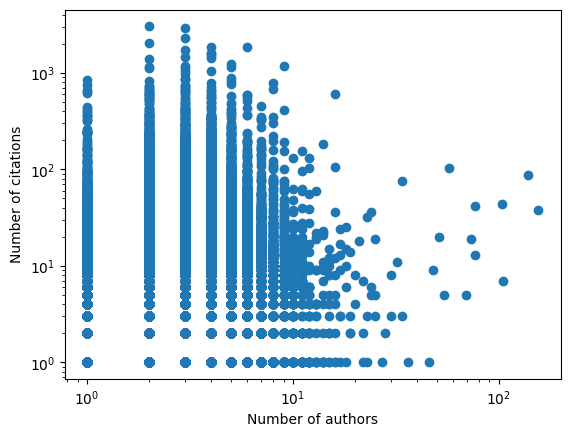

In [74]:

import matplotlib.pyplot as plt
plt.scatter(all_together['number_of_authors'], all_together['number_of_citations'])
plt.xlabel('Number of authors')
plt.ylabel('Number of citations')
plt.yscale('log')
plt.xscale('log')
plt.show()

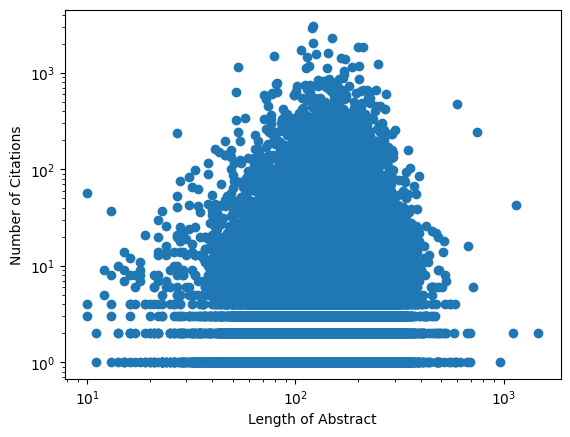

In [80]:
# Calculate the length of each abstract
all_together['abstract_length'] = all_together['abstracts'].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)

# Plot the number of citations with respect to the length of the abstract
plt.scatter(all_together['abstract_length'], all_together['number_of_citations'])
plt.xlabel('Length of Abstract')
plt.ylabel('Number of Citations')
plt.yscale('log')
plt.xscale('log')
plt.show()

<h1> MLP aproach </h1>
In order to predict whether a paper cites another paper we are going to train a MLP model using the following features:
- Number of authors
- Number of words in the abstract

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
